In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_input = pd.read_csv('train_data.csv')
test_input = pd.read_csv('test_data.csv')

In [3]:
print(train_input.shape)
print(test_input.shape)

(69933, 8)
(17484, 7)


In [4]:
train_input.head()

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
0,13,top_in_3,bot_in_24,top_out_8,bot_out_2,-4.3303,11.1340,3.172
1,13,top_in_4,bot_in_30,top_out_47,bot_out_42,-4.3359,10.4282,2.952
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
4,1,top_in_3,bot_in_10,top_out_2,bot_out_1,-4.3219,10.4198,2.928


In [5]:
test_input.head()

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2
0,25,top_in_2,bot_in_1,top_out_29,bot_out_13,10.0219,-3.3461
1,8,top_in_1,bot_in_4,top_out_31,bot_out_39,-3.4813,10.0562
2,3,top_in_1,bot_in_2,top_out_35,bot_out_43,-3.5100,10.0501
3,11,top_in_4,bot_in_40,top_out_37,bot_out_19,-4.3366,10.4269
4,21,top_in_1,bot_in_4,top_out_11,bot_out_25,-3.4895,9.9315


In [7]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69933 entries, 0 to 69932
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MACHINE_NO  69933 non-null  int64  
 1   EQUIP1      69933 non-null  object 
 2   EQUIP2      69933 non-null  object 
 3   EQUIP3      69933 non-null  object 
 4   EQUIP4      69933 non-null  object 
 5   VAL1        69933 non-null  float64
 6   VAL2        69933 non-null  float64
 7   OUT         69933 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.3+ MB


In [8]:
test_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17484 entries, 0 to 17483
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MACHINE_NO  17484 non-null  int64  
 1   EQUIP1      17484 non-null  object 
 2   EQUIP2      17484 non-null  object 
 3   EQUIP3      17484 non-null  object 
 4   EQUIP4      17484 non-null  object 
 5   VAL1        17484 non-null  float64
 6   VAL2        17484 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 956.3+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(4):
    train_input["EQUIP"+str(i+1)] = le.fit_transform(train_input["EQUIP"+str(i+1)])
    test_input["EQUIP"+str(i+1)] = le.fit_transform(test_input["EQUIP"+str(i+1)])
   

In [10]:
data = train_input

In [11]:
data.head()

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
0,13,2,16,52,11,-4.3303,11.1340,3.172
1,13,3,22,41,36,-4.3359,10.4282,2.952
2,3,1,9,32,16,10.2006,-3.3653,-2.496
3,25,1,15,20,3,10.0852,-3.3595,-1.396
4,1,2,1,11,0,-4.3219,10.4198,2.928


In [12]:
data.describe()

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
count,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000
mean,20.399654,0.694794,16.125306,22.492857,24.669098,1.393548,5.177607,-0.320425
std,11.213706,0.729499,13.022242,15.421476,16.311928,6.529686,6.480383,2.223285
min,1.000000,0.000000,0.000000,0.000000,0.000000,-6.361200,-5.612800,-7.148000
25%,12.000000,0.000000,4.000000,9.000000,11.000000,-3.485500,-3.357900,-2.024000
50%,21.000000,1.000000,12.000000,21.000000,23.000000,-3.359000,9.794900,-0.496000
75%,31.000000,1.000000,30.000000,33.000000,38.000000,9.978600,10.109500,1.500000
max,38.000000,4.000000,38.000000,53.000000,53.000000,12.257000,13.687200,7.800000


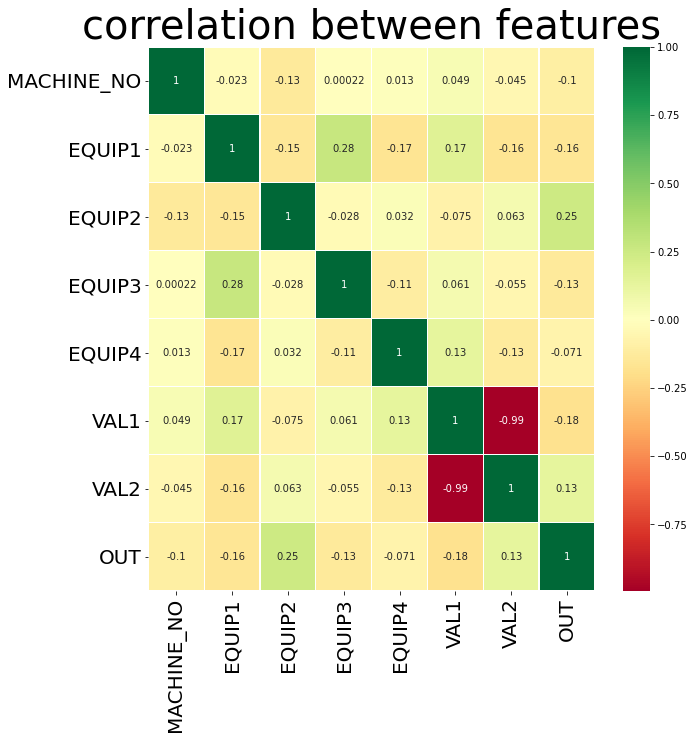

In [13]:
# heatmap 그리기
heatmap = sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.title('correlation between features', fontsize=40)

plt.show()

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

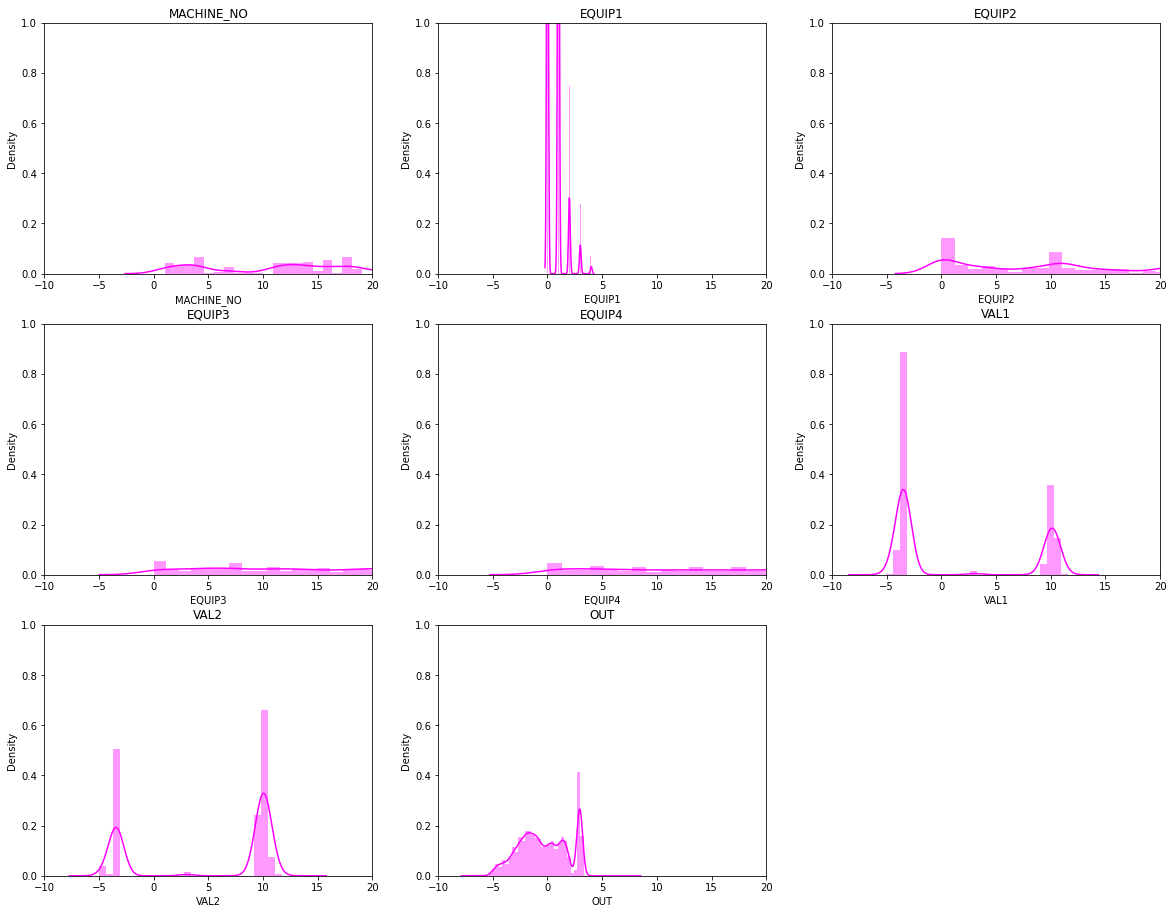

In [14]:
# 각 센서별 분포그래프 그리기
feature = data.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.xlim(-10,20)
    plt.ylim(0,1)
    sns.distplot(data[feature[i]],color='magenta')
plt.show()